# Topic Analysis

This notebook analyzes the commentedPool.json file from the 2025.04.05 ToPeraicaLiska folder to extract and analyze topics.

In [1]:
# Import required libraries
import json
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import logging
import sys
import os

# Import all functions from the topic module
from src.analysis.topic import (
    read_json_in_chunks_with_ids,
    parse_topic_file,
    update_comments_with_clusters,
    analyze_cluster_distribution,
    analyze_user_clusters,
    calculate_user_sentiment_ratios,
    load_and_process_data,
    search_comments,
    display_search_results
)

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [2]:
# First, define your file paths
JSON_FILE = Path('2025.04.05 ToPeraicaLiska/commentedPool.json')
TOPICS_FILE = Path('2025.04.05 ToPeraicaLiska/Topics/topicEVOC_artClusterText_KeyBERT_0.txt')

# Use the load_and_process_data function to load and process everything
articles_df, comments_df = load_and_process_data(
    json_file_path=JSON_FILE,
    topic_file_path=TOPICS_FILE,
    max_entries=200000  # Adjust as needed
)

# Now you can run the analyze_cluster_distribution function
cluster_stats = analyze_cluster_distribution(comments_df)

# Display the statistics
total_comments = cluster_stats['total_comments']

print(f"\nCluster Assignment Statistics:")
print(f"Total comments: {total_comments}")
print(f"All comments have been assigned to clusters (including Unlabelled)")

print("\nDistribution of comments across clusters:")
for cluster_id, info in sorted(cluster_stats['clusters'].items()):
    label = info['label']
    count = info['count']
    percentage = info['percentage']
    print(f"Cluster {cluster_id} ({label}): {count} comments ({percentage:.2f}%)")

Reading JSON file: 0it [00:00, ?it/s]

Reading JSON file: 15517824it [00:07, 2060388.36it/s]
INFO:src.analysis.topic:Total number of articles: 10610
INFO:src.analysis.topic:Total number of comments: 348047



Cluster Assignment Statistics:
Total comments: 348047
All comments have been assigned to clusters (including Unlabelled)

Distribution of comments across clusters:
Cluster -1 (Unlabelled): 182243 comments (52.36%)
Cluster 0 (33 trumpovu mohl): 238 comments (0.07%)
Cluster 1 (29 papež náboženským): 62 comments (0.02%)
Cluster 2 (48 princezna svatby): 57 comments (0.02%)
Cluster 3 (37 jihokorejskému zatčením): 32 comments (0.01%)
Cluster 4 (38 severokorejští raket): 41 comments (0.01%)
Cluster 5 (64 putinovo rusům): 592 comments (0.17%)
Cluster 6 (34 požárům kalifornie): 12 comments (0.00%)
Cluster 7 (34 nevidomí nepozornosti): 175 comments (0.05%)
Cluster 9 (23 aerolinkách cathay): 55 comments (0.02%)
Cluster 10 (26 konzole videohry): 46 comments (0.01%)
Cluster 11 (103 ghostrunneru maskotem): 208 comments (0.06%)
Cluster 12 (38 pražském letadel): 557 comments (0.16%)
Cluster 13 (93 brazílii miliardářkou): 4390 comments (1.26%)
Cluster 14 (21 demonstranti propalestinské): 3 comments (0

In [46]:
articles_df.columns


Index(['docId', 'docCode', 'docType', 'author', 'publishDate', 'url', 'title',
       'content', 'attributes', 'docIdx', 'article_id', 'cluster_id',
       'cluster_label'],
      dtype='object')

In [3]:
# Use the analyze_user_clusters function to analyze which clusters each user posts to
user_cluster_df, statistics = analyze_user_clusters(comments_df)

# Display statistics
print(f"Total number of users: {statistics['total_users']}")
print("\nDistribution of users by number of clusters they post to:")
for cluster_count, info in sorted(statistics['distribution'].items()):
    print(f"Users posting to {cluster_count} different clusters: {info['num_users']} ({info['percentage']:.2f}%)")

# Show top users who post to the most clusters
print("\nTop 10 users who post to the most different clusters:")
for user in statistics['top_users']:
    print(f"User: {user['author']}")
    print(f"  Posts to {user['unique_clusters']} different clusters")
    print(f"  Total comments: {user['comment_count']}")
    
    # Display the top clusters
    cluster_count = len(user['top_clusters'])
    total_clusters = user['unique_clusters']
    
    if cluster_count < total_clusters:
        print(f"  Top {cluster_count} clusters (out of {total_clusters}):")
    else:
        print(f"  Clusters:")
    
    for cluster in user['top_clusters']:
        print(f"    - Cluster {cluster['cluster_id']}: {cluster['label']}")
    print()

Total number of users: 47657

Distribution of users by number of clusters they post to:
Users posting to 1 different clusters: 22163 (46.51%)
Users posting to 2 different clusters: 8240 (17.29%)
Users posting to 3 different clusters: 4623 (9.70%)
Users posting to 4 different clusters: 2962 (6.22%)
Users posting to 5 different clusters: 1990 (4.18%)
Users posting to 6 different clusters: 1501 (3.15%)
Users posting to 7 different clusters: 1138 (2.39%)
Users posting to 8 different clusters: 846 (1.78%)
Users posting to 9 different clusters: 671 (1.41%)
Users posting to 10 different clusters: 520 (1.09%)
Users posting to 11 different clusters: 469 (0.98%)
Users posting to 12 different clusters: 330 (0.69%)
Users posting to 13 different clusters: 328 (0.69%)
Users posting to 14 different clusters: 251 (0.53%)
Users posting to 15 different clusters: 245 (0.51%)
Users posting to 16 different clusters: 207 (0.43%)
Users posting to 17 different clusters: 138 (0.29%)
Users posting to 18 differe

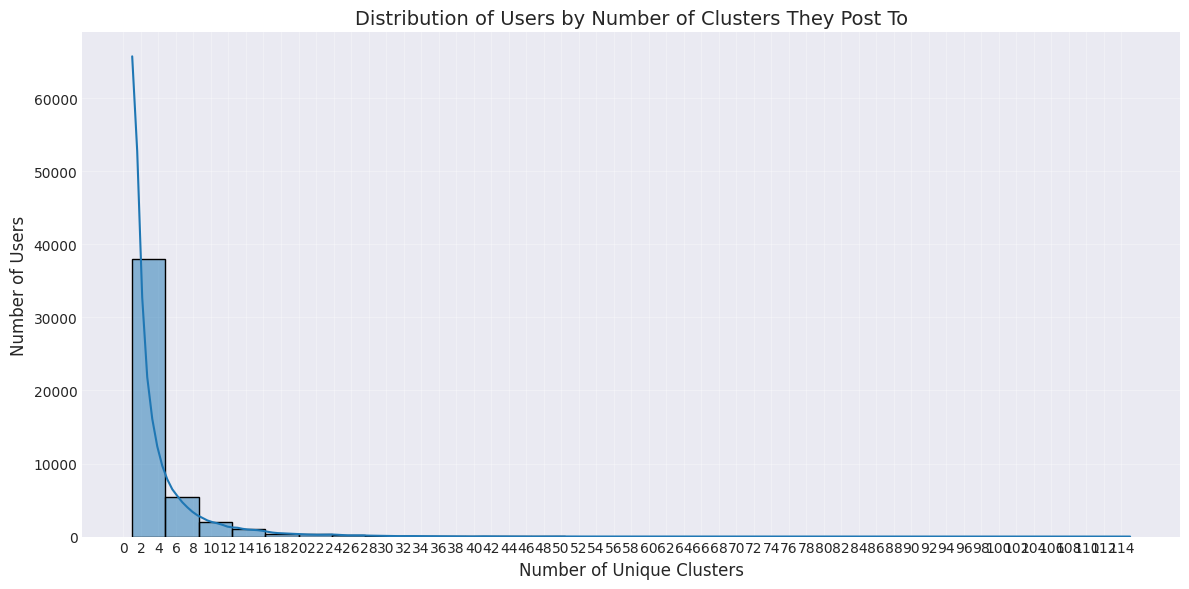

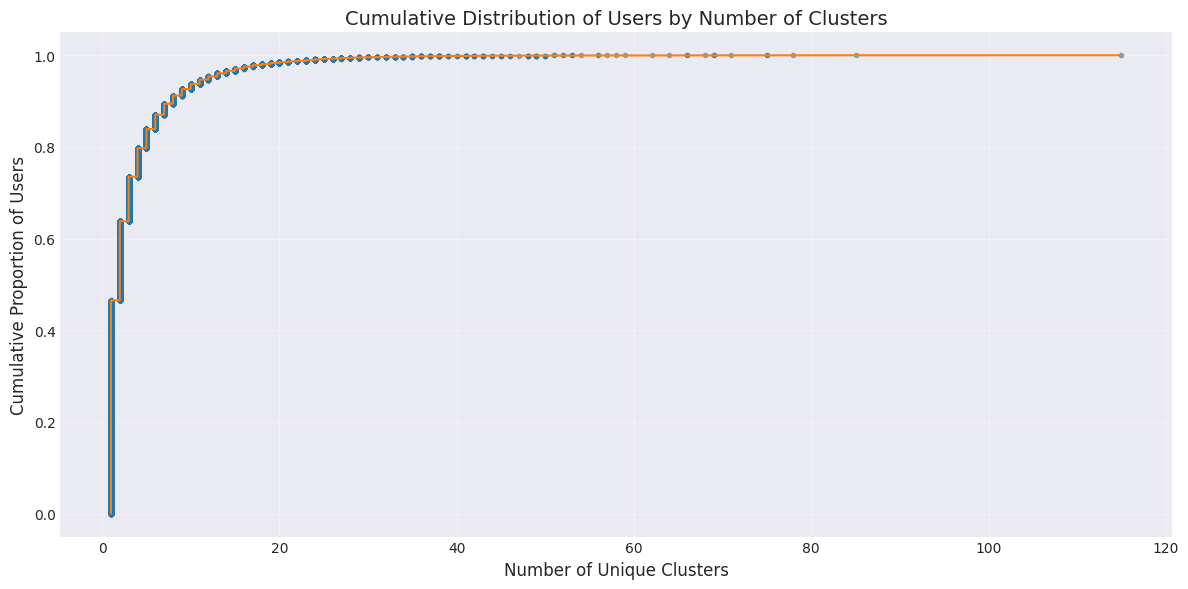

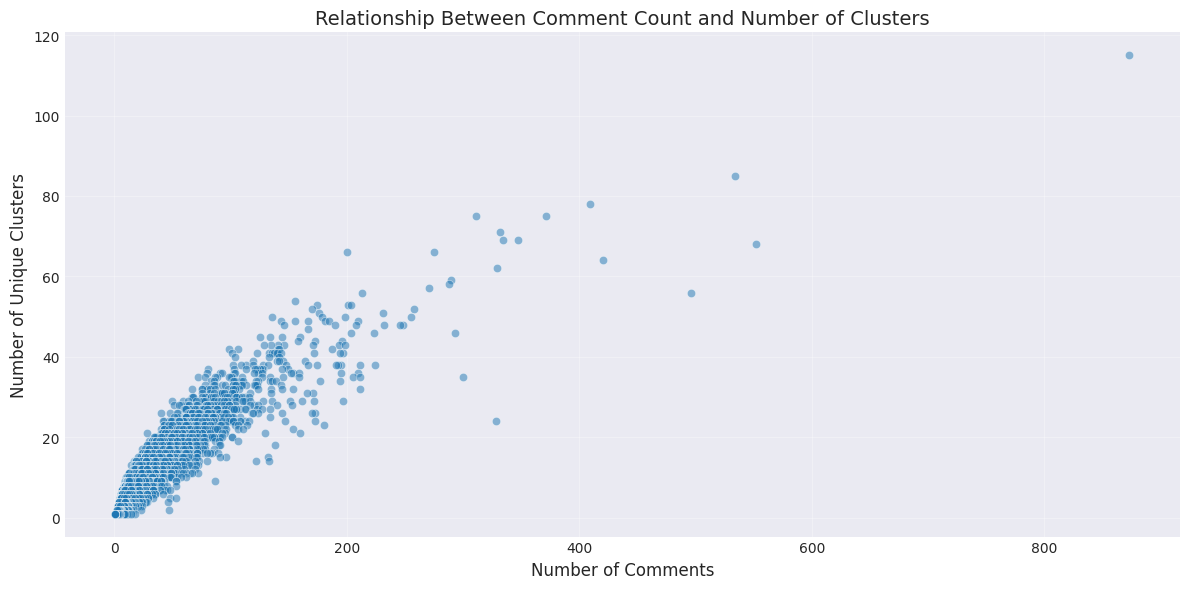

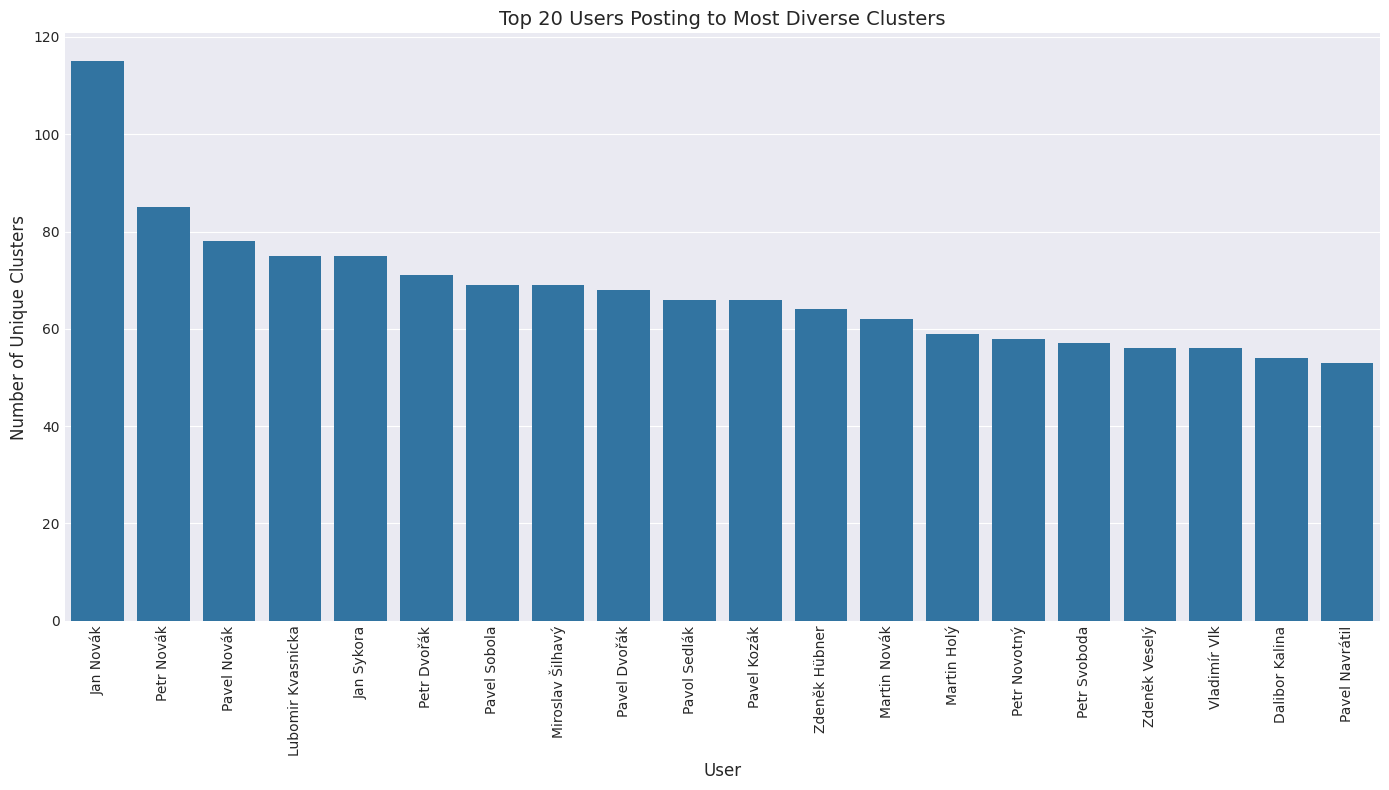

Summary Statistics for Unique Clusters per User:
count    47657.000000
mean         3.408712
std          4.716214
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        115.000000
Name: unique_clusters, dtype: float64

Percentage of users by number of clusters:
1 clusters: 46.51%
2 clusters: 17.29%
3 clusters: 9.70%
4 clusters: 6.22%
5 clusters: 4.18%
6 clusters: 3.15%
7 clusters: 2.39%
8 clusters: 1.78%
9 clusters: 1.41%
10 clusters: 1.09%
11 clusters: 0.98%
12 clusters: 0.69%
13 clusters: 0.69%
14 clusters: 0.53%
15 clusters: 0.51%
16 clusters: 0.43%
17 clusters: 0.29%
18 clusters: 0.25%
19 clusters: 0.24%
20 clusters: 0.18%
21 clusters: 0.16%
22 clusters: 0.14%
23 clusters: 0.14%
24 clusters: 0.17%
25 clusters: 0.10%
26 clusters: 0.09%
27 clusters: 0.11%
28 clusters: 0.07%
29 clusters: 0.07%
30 clusters: 0.04%
31 clusters: 0.03%
32 clusters: 0.04%
33 clusters: 0.04%
34 clusters: 0.03%
35 clusters: 0.03%
36 clusters: 0.03%
37 clusters: 0.0

In [4]:
# Import visualization libraries if not already imported
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for the plots
plt.style.use('seaborn-v0_8-darkgrid')

# Figure 1: Distribution of users by number of clusters
plt.figure(figsize=(12, 6))
sns.histplot(data=user_cluster_df, x='unique_clusters', kde=True, bins=30)
plt.title('Distribution of Users by Number of Clusters They Post To', fontsize=14)
plt.xlabel('Number of Unique Clusters', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(range(0, max(user_cluster_df['unique_clusters'])+1, 2))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Figure 2: Cumulative distribution function (CDF)
plt.figure(figsize=(12, 6))
# Sort values for CDF
sorted_values = np.sort(user_cluster_df['unique_clusters'].values)
# Get y values for CDF
yvals = np.arange(1, len(sorted_values)+1) / float(len(sorted_values))
# Plot CDF
plt.plot(sorted_values, yvals, marker='.', linestyle='none', alpha=0.5)
plt.plot(sorted_values, yvals, linestyle='-')
plt.title('Cumulative Distribution of Users by Number of Clusters', fontsize=14)
plt.xlabel('Number of Unique Clusters', fontsize=12)
plt.ylabel('Cumulative Proportion of Users', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Figure 3: Scatter plot of unique clusters vs. comment count
plt.figure(figsize=(12, 6))
plt.scatter(user_cluster_df['comment_count'], user_cluster_df['unique_clusters'], 
            alpha=0.5, edgecolor='w', linewidth=0.5)
plt.title('Relationship Between Comment Count and Number of Clusters', fontsize=14)
plt.xlabel('Number of Comments', fontsize=12)
plt.ylabel('Number of Unique Clusters', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Figure 4: Top 20 users with most diverse posting patterns
top_20_users = user_cluster_df.head(20)
plt.figure(figsize=(14, 8))
sns.barplot(data=top_20_users, x='author', y='unique_clusters')
plt.title('Top 20 Users Posting to Most Diverse Clusters', fontsize=14)
plt.xlabel('User', fontsize=12)
plt.ylabel('Number of Unique Clusters', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary Statistics for Unique Clusters per User:")
print(user_cluster_df['unique_clusters'].describe())

# Compute percentage of users by cluster count
cluster_counts = user_cluster_df['unique_clusters'].value_counts(normalize=True).sort_index() * 100
print("\nPercentage of users by number of clusters:")
for clusters, percentage in cluster_counts.items():
    print(f"{clusters} clusters: {percentage:.2f}%")

In [9]:
len(user_cluster_df)

47657

Loading user_anomaly_scores.csv...
Loading user_anomaly_scores_lof.csv...

File 1 - user_anomaly_scores.csv:
Shape: (9786, 3)
Columns: ['author', 'anomaly_score_iforest', 'anomaly_score_lof']
              author  anomaly_score_iforest  anomaly_score_lof
0   Vladimír Kalinay               0.254494           1.286895
1        Jan Jiříček               0.249950           1.063876
2  Radoslav Nešpůrek               0.248959           1.133372

File 2 - user_anomaly_scores_lof.csv:
Shape: (9786, 3)
Columns: ['author', 'anomaly_score_iforest', 'anomaly_score_lof']
             author  anomaly_score_iforest  anomaly_score_lof
0  František Osvald               0.185707           1.835765
1    Michael Budera               0.113703           1.710030
2   Inka Vavrečková               0.087464           1.679696

Using columns: author, anomaly_score_iforest from file 1
Using columns: author, anomaly_score_iforest from file 2

Top 20 users by number of clusters with their anomaly scores:
        

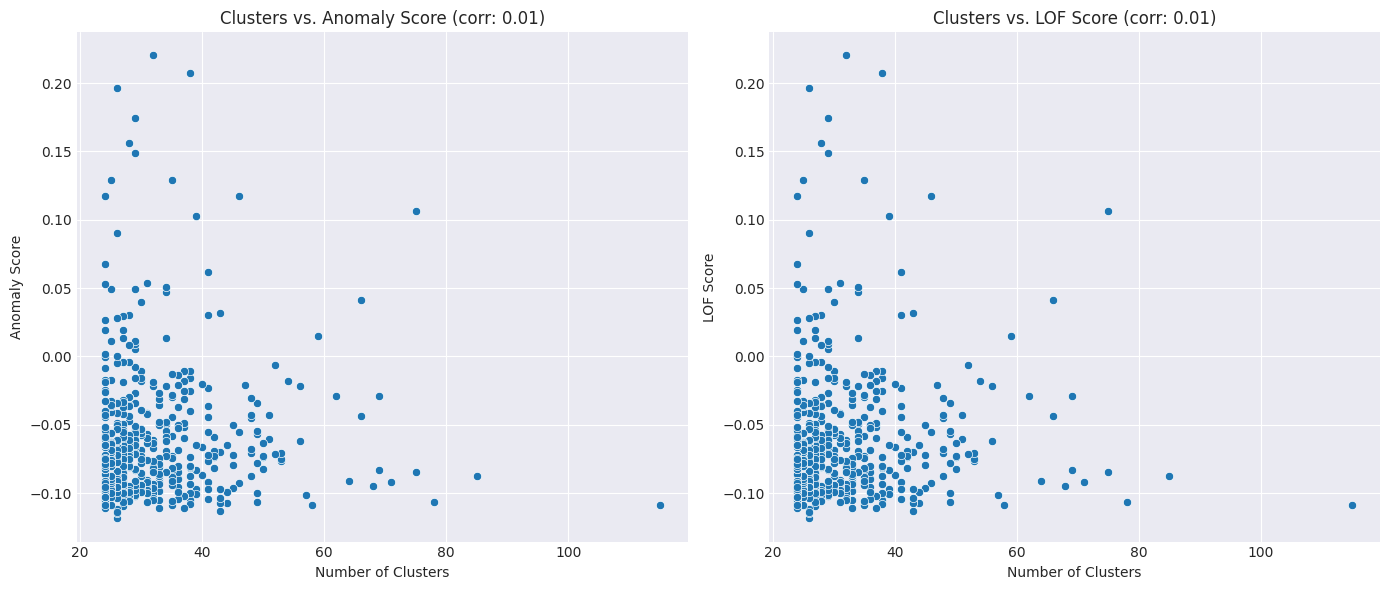

In [13]:
# Load anomaly scores for top cluster-posting users from exact paths
import pandas as pd
from pathlib import Path
import sys

# Add the parent directory to path to import TrollPredictor
sys.path.append("/home/luuka/thesis/workspace")
from src.models.predictor import TrollPredictor

# Define paths to the specific files
anomaly_file1 = Path("/home/luuka/thesis/workspace/user_anomaly_scores.csv")
anomaly_file2 = Path("/home/luuka/thesis/workspace/user_anomaly_scores_lof.csv")

# Load the files
print(f"Loading {anomaly_file1.name}...")
scores_df1 = pd.read_csv(anomaly_file1)
print(f"Loading {anomaly_file2.name}...")
scores_df2 = pd.read_csv(anomaly_file2)

# Display basic info about the loaded files
print(f"\nFile 1 - {anomaly_file1.name}:")
print(f"Shape: {scores_df1.shape}")
print(f"Columns: {scores_df1.columns.tolist()}")
print(scores_df1.head(3))

print(f"\nFile 2 - {anomaly_file2.name}:")
print(f"Shape: {scores_df2.shape}")
print(f"Columns: {scores_df2.columns.tolist()}")
print(scores_df2.head(3))

# Determine the username column in each file based on column names
username_col1 = next((col for col in scores_df1.columns if 'user' in col.lower() or 'author' in col.lower()), scores_df1.columns[0])
username_col2 = next((col for col in scores_df2.columns if 'user' in col.lower() or 'author' in col.lower()), scores_df2.columns[0])

# Determine score column in each file
score_col1 = next((col for col in scores_df1.columns if 'score' in col.lower() or 'anomaly' in col.lower()), scores_df1.columns[1])
score_col2 = next((col for col in scores_df2.columns if 'score' in col.lower() or 'anomaly' in col.lower() or 'lof' in col.lower()), scores_df2.columns[1])

print(f"\nUsing columns: {username_col1}, {score_col1} from file 1")
print(f"Using columns: {username_col2}, {score_col2} from file 2")

# Get top 20 users from user_cluster_df (created in previous code)
top_users = user_cluster_df.head(500)['author'].tolist()

# Create a result DataFrame
result_df = pd.DataFrame({'user': top_users})
result_df['num_clusters'] = [user_cluster_df[user_cluster_df['author'] == user]['unique_clusters'].values[0] for user in top_users]

# Add scores from the files
scores_dict1 = dict(zip(scores_df1[username_col1], scores_df1[score_col1]))
result_df['anomaly_score'] = result_df['user'].map(lambda x: scores_dict1.get(x, None))

scores_dict2 = dict(zip(scores_df2[username_col2], scores_df2[score_col2]))
result_df['lof_score'] = result_df['user'].map(lambda x: scores_dict2.get(x, None))

# Display results
print("\nTop 20 users by number of clusters with their anomaly scores:")
pd.set_option('display.max_columns', None)
print(result_df)

# Calculate correlation between number of clusters and scores
corr1 = result_df['num_clusters'].corr(result_df['anomaly_score'].fillna(0))
print(f"\nCorrelation between num_clusters and anomaly_score: {corr1:.4f}")

corr2 = result_df['num_clusters'].corr(result_df['lof_score'].fillna(0))
print(f"Correlation between num_clusters and lof_score: {corr2:.4f}")

# Create a scatter plot to visualize the relationship
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Plot 1: Anomaly Score
plt.subplot(1, 2, 1)
sns.scatterplot(data=result_df, x='num_clusters', y='anomaly_score')
plt.title(f'Clusters vs. Anomaly Score (corr: {corr1:.2f})')
plt.xlabel('Number of Clusters')
plt.ylabel('Anomaly Score')

# Plot 2: LOF Score
plt.subplot(1, 2, 2)
sns.scatterplot(data=result_df, x='num_clusters', y='lof_score')
plt.title(f'Clusters vs. LOF Score (corr: {corr2:.2f})')
plt.xlabel('Number of Clusters')
plt.ylabel('LOF Score')

plt.tight_layout()
plt.show()

In [14]:
from src.models.predictor import TrollPredictor
from pathlib import Path

DATA_DIR = Path('data')

# Initialize predictor with model
model_path = "./checkpoints/best_model.pt"

predictor = TrollPredictor(
    model_path=model_path,
    comments_per_user=15,
    max_length=96
)


Prediction results for top 50 users:
                user  num_clusters prediction  confidence  troll_probability  \
0          Jan Novák           115      troll    0.754476           0.754476   
1         Petr Novák            85  not_troll    0.549557           0.450443   
2        Pavel Novák            78      troll    0.729473           0.729473   
3  Lubomir Kvasnicka            75  not_troll    0.534712           0.465288   
4         Jan Sykora            75      troll    0.874830           0.874830   
5        Petr Dvořák            71      troll    0.853573           0.853573   
6       Pavel Sobola            69      troll    0.626935           0.626935   
7   Miroslav Šilhavý            69      troll    0.547389           0.547389   
8       Pavel Dvořák            68  not_troll    0.547442           0.452558   
9       Pavol Sedlák            66      troll    0.808916           0.808916   

   anomaly_score  lof_score  
0      -0.108752  -0.108752  
1      -0.087698  -0.

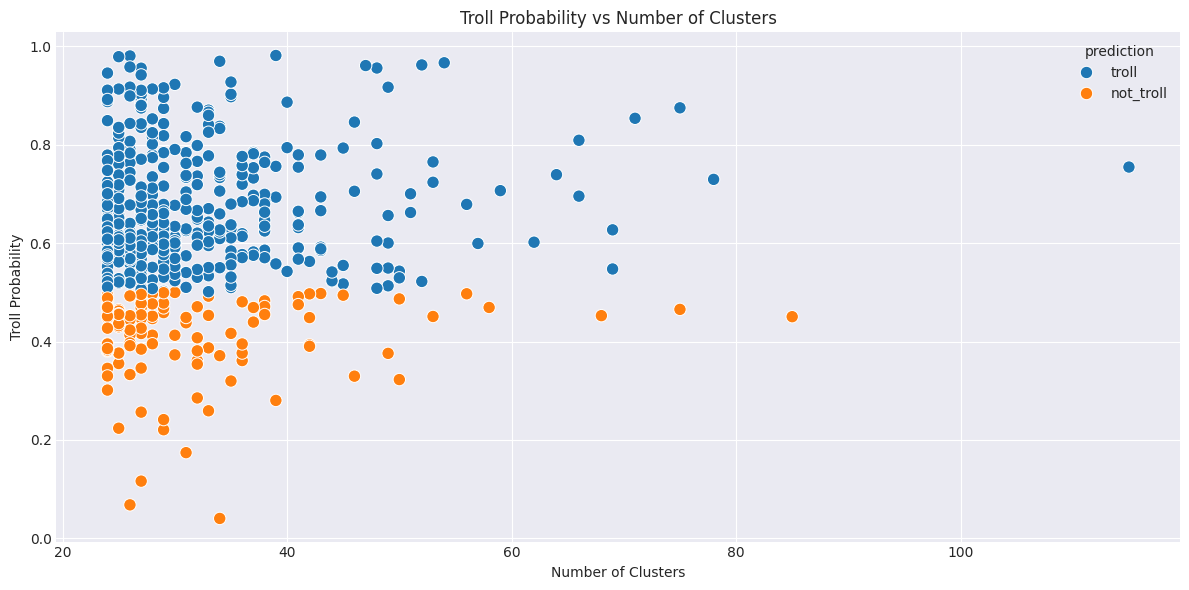

In [15]:
#Initialize results list
prediction_results = []

# Process each user
for user in top_users:
    # Get the user's comments
    user_comments = comments_df[comments_df['author'] == user]['content'].tolist()
    
    # Skip if no comments found
    if not user_comments:
        print(f"No comments found for user {user}, skipping...")
        continue
    
    # Take a sample of comments if there are too many
    if len(user_comments) > 20:
        import random
        user_comments = random.sample(user_comments, 20)
    
    # Get number of clusters
    num_clusters = user_cluster_df[user_cluster_df['author'] == user]['unique_clusters'].values[0]
    
    try:
        # Predict using TrollPredictor
        prediction = predictor.predict_batch(user_comments)
        
        # Store results
        prediction_results.append({
            'user': user,
            'num_clusters': num_clusters,
            'prediction': prediction['prediction'],
            'confidence': prediction['confidence'],
            'troll_probability': prediction['probabilities'][1],
            'num_comments': len(user_comments)
        })
    
    except Exception as e:
        print(f"Error processing user {user}: {e}")
        # Add error entry
        prediction_results.append({
            'user': user,
            'num_clusters': num_clusters,
            'prediction': 'error',
            'confidence': None,
            'troll_probability': None,
            'num_comments': len(user_comments),
            'error': str(e)
        })

# Create DataFrame with prediction results
prediction_df = pd.DataFrame(prediction_results)

# Merge prediction results with existing result_df (assuming it has anomaly and lof scores)
merged_results = prediction_df.merge(result_df, on='user', how='left', suffixes=('', '_old'))

# Display results
print("\nPrediction results for top 50 users:")
print(merged_results[['user', 'num_clusters', 'prediction', 'confidence', 'troll_probability', 'anomaly_score', 'lof_score']].head(10))

# Calculate statistics
num_trolls = len(merged_results[merged_results['prediction'] == 'troll'])
num_non_trolls = len(merged_results[merged_results['prediction'] == 'not_troll'])
num_errors = len(merged_results[merged_results['prediction'] == 'error'])

print(f"\nStatistics:")
print(f"Total users processed: {len(merged_results)}")
print(f"Classified as trolls: {num_trolls} ({num_trolls/len(merged_results)*100:.1f}%)")
print(f"Classified as non-trolls: {num_non_trolls} ({num_non_trolls/len(merged_results)*100:.1f}%)")
print(f"Errors: {num_errors} ({num_errors/len(merged_results)*100:.1f}%)")

# Create visualization for troll predictions vs. cluster behavior
plt.figure(figsize=(12, 6))
valid_rows = merged_results[merged_results['prediction'] != 'error']

# Plot troll probability vs number of clusters
sns.scatterplot(data=valid_rows, x='num_clusters', y='troll_probability', hue='prediction', s=80)
plt.title('Troll Probability vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Troll Probability')
plt.tight_layout()
plt.show()

In [16]:
def get_user_sentiment_ratios(comments_df, username):
    # Filter comments for the specific user
    user_comments = comments_df[comments_df['author'] == username]
    
    if len(user_comments) == 0:
        return {"error": f"No comments found for user: {username}"}
    
    # Extract sentiment values from the attributes column
    sentiments = []
    for attrs in user_comments['attributes']:
        if isinstance(attrs, dict) and 'sentiment' in attrs:
            sentiments.append(attrs['sentiment'])
    
    # Count occurrences of each sentiment
    total_comments = len(sentiments)
    negative_count = sentiments.count('Negative')
    positive_count = sentiments.count('Positive')
    ambivalent_count = sentiments.count('Ambivalent')
    
    # Calculate ratios
    ratios = {
        'total_comments': total_comments,
        'negative_ratio': negative_count / total_comments if total_comments > 0 else 0,
        'positive_ratio': positive_count / total_comments if total_comments > 0 else 0,
        'ambivalent_ratio': ambivalent_count / total_comments if total_comments > 0 else 0,
        'counts': {
            'negative': negative_count,
            'positive': positive_count,
            'ambivalent': ambivalent_count
        }
    }
    
    return ratios

In [17]:
username = "Pavel Sedlák"  # Replace with the username you want to analyze
sentiment_ratios = get_user_sentiment_ratios(comments_df, username)
print(f"Sentiment ratios for {username}:")
print(f"Negative: {sentiment_ratios['negative_ratio']:.2f} ({sentiment_ratios['counts']['negative']} comments)")
print(f"Positive: {sentiment_ratios['positive_ratio']:.2f} ({sentiment_ratios['counts']['positive']} comments)")
print(f"Ambivalent: {sentiment_ratios['ambivalent_ratio']:.2f} ({sentiment_ratios['counts']['ambivalent']} comments)")


Sentiment ratios for Pavel Sedlák:
Negative: 0.50 (5 comments)
Positive: 0.20 (2 comments)
Ambivalent: 0.10 (1 comments)


In [18]:
# Step 1: Calculate number of clusters for ALL users
def calculate_clusters_per_user(comments_df):
    """
    Calculate the number of unique clusters (topics) each user posts to
    """
    # Check if 'cluster' or 'topic' column exists in comments_df
    cluster_column = None
    if 'cluster' in comments_df.columns:
        cluster_column = 'cluster'
    elif 'topic' in comments_df.columns:
        cluster_column = 'topic'
    else:
        raise ValueError("No 'cluster' or 'topic' column found in comments_df")
    
    # Count unique clusters per user
    user_clusters = comments_df.groupby('author')[cluster_column].nunique().reset_index()
    user_clusters.columns = ['user', 'num_clusters']
    
    print(f"Calculated number of clusters for {len(user_clusters)} users")
    return user_clusters

In [19]:
def calculate_all_user_sentiment_ratios(comments_df):
    # Get unique users
    users = comments_df['author'].unique()
    
    # Initialize results dictionary
    results = {
        'author': [],
        'negative_ratio': [],
        'positive_ratio': [],
        'ambivalent_ratio': [],
        'neutral_ratio': [],
        'comment_count': []
    }
    
    # Calculate sentiment ratios for each user
    for user in users:
        user_comments = comments_df[comments_df['author'] == user]
        
        if len(user_comments) == 0:
            continue
        
        # Extract sentiment values
        sentiments = []
        for attrs in user_comments['attributes']:
            if isinstance(attrs, dict) and 'sentiment' in attrs:
                sentiments.append(attrs['sentiment'])
        
        total_comments = len(sentiments)
        if total_comments == 0:
            continue
            
        negative_count = sentiments.count('Negative')
        positive_count = sentiments.count('Positive')
        ambivalent_count = sentiments.count('Ambivalent')
        neutral_count = sentiments.count('Neutral')
        
        # Add to results
        results['author'].append(user)
        results['negative_ratio'].append(negative_count / total_comments)
        results['positive_ratio'].append(positive_count / total_comments)
        results['ambivalent_ratio'].append(ambivalent_count / total_comments)
        results['neutral_ratio'].append(neutral_count / total_comments)
        results['comment_count'].append(total_comments)
    
    # Convert to DataFrame
    return pd.DataFrame(results)

In [20]:
def calculate_user_sentiment_ratios(comments_df, max_users=100, random_sample=True):
    """
    Calculate sentiment ratios for a subset of users
    """
    # Get unique users
    users = comments_df['author'].unique()
    
    # Take a subset of users
    if len(users) > max_users:
        if random_sample:
            import random
            random.seed(42)
            users = random.sample(list(users), max_users)
        else:
            users = users[:max_users]
    
    print(f"Processing {len(users)} users for sentiment analysis...")
    
    # Initialize results dictionary
    results = {
        'user': [],  # Using 'user' directly to match with user_clusters
        'negative_ratio': [],
        'positive_ratio': [],
        'ambivalent_ratio': [],
        'neutral_ratio': [],
        'comment_count': []
    }
    
    # Calculate sentiment ratios for each user
    for user in users:
        user_comments = comments_df[comments_df['author'] == user]
        
        if len(user_comments) == 0:
            continue
        
        # Extract sentiment values
        sentiments = []
        for attrs in user_comments['attributes']:
            if isinstance(attrs, dict) and 'sentiment' in attrs:
                sentiments.append(attrs['sentiment'])
        
        total_comments = len(sentiments)
        if total_comments == 0:
            continue
            
        negative_count = sentiments.count('Negative')
        positive_count = sentiments.count('Positive')
        ambivalent_count = sentiments.count('Ambivalent')
        neutral_count = sentiments.count('Neutral')
        
        # Add to results
        results['user'].append(user)
        results['negative_ratio'].append(negative_count / total_comments if total_comments > 0 else 0)
        results['positive_ratio'].append(positive_count / total_comments if total_comments > 0 else 0)
        results['ambivalent_ratio'].append(ambivalent_count / total_comments if total_comments > 0 else 0)
        results['neutral_ratio'].append(neutral_count / total_comments if total_comments > 0 else 0)
        results['comment_count'].append(total_comments)
    
    # Convert to DataFrame
    return pd.DataFrame(results)

In [102]:
# Sentiment Pattern Analysis for Detecting Potential Troll Behavior
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate sentiment ratios for a larger sample of users
sample_size = 1000 
print(f"Calculating sentiment ratios for {sample_size} users...")
sentiment_df = calculate_user_sentiment_ratios(comments_df, max_users=sample_size, random_sample=True)

# 1. Identify users with abnormally high negative sentiment ratios
# Calculate statistical thresholds for outliers (using z-score)
mean_negative = sentiment_df['negative_ratio'].mean()
std_negative = sentiment_df['negative_ratio'].std()
threshold_zscore = 1  # Users with z-score

# Rename 'user' column to 'author' in sentiment_df
sentiment_df = sentiment_df.rename(columns={'user': 'author'})

# Add z-score to dataframe
sentiment_df['negative_zscore'] = (sentiment_df['negative_ratio'] - mean_negative) / std_negative
potential_trolls = sentiment_df[sentiment_df['negative_zscore'] > threshold_zscore].copy()

print(f"\nPotential troll detection summary:")
print(f"Average negative sentiment ratio across all users: {mean_negative:.4f}")
print(f"Standard deviation: {std_negative:.4f}")
print(f"Threshold for flagging (z-score > {threshold_zscore}): {mean_negative + threshold_zscore * std_negative:.4f}")
print(f"Found {len(potential_trolls)} users with abnormally high negative sentiment ratios")

# 2. Analyze consistency of negative sentiment across clusters
# Merge with user_cluster data to get cluster information
user_cluster_df_copy = user_cluster_df.copy()  # Use the dataframe from analyze_user_clusters

# Merge to add cluster information to our potential trolls
potential_trolls = potential_trolls.merge(
    user_cluster_df_copy[['author', 'unique_clusters', 'comment_count']], 
    on='author', 
    how='left', 
    suffixes=('', '_cluster')
)

# Look for users who are both negative and post across many clusters
potential_trolls['troll_score'] = (
    potential_trolls['negative_zscore'] * 
    np.log1p(potential_trolls['unique_clusters'])  # log to avoid overweighting
)

# Sort by our troll score
potential_trolls = potential_trolls.sort_values('troll_score', ascending=False)

# Display top potential trolls
print("\nTop 10 potential trolls based on negative sentiment and topic diversity:")
for i, (_, user) in enumerate(potential_trolls.head(10).iterrows(), 1):
    print(f"{i}. {user['author']}")
    print(f"   Negative ratio: {user['negative_ratio']:.4f} (z-score: {user['negative_zscore']:.2f})")
    print(f"   Posts across {user['unique_clusters']} different clusters/topics")
    print(f"   Total comments: {user['comment_count']}")

# 3. Compare sentiment distribution of potential trolls vs. average users
# Create a visualization to compare distributions
plt.figure(figsize=(14, 10))

# Plot 1: Distribution of sentiment ratios comparing potential trolls vs others
plt.subplot(2, 2, 1)
sns.histplot(sentiment_df['negative_ratio'], kde=True, color='blue', alpha=0.5, label='All users')
sns.histplot(potential_trolls['negative_ratio'], kde=True, color='red', alpha=0.5, label='Potential trolls')
plt.xlabel('Negative Sentiment Ratio')
plt.ylabel('Count')
plt.title('Distribution of Negative Sentiment Ratios')
plt.legend()

# Plot 2: Negative vs. Positive sentiment ratios
plt.subplot(2, 2, 2)
plt.scatter(sentiment_df['negative_ratio'], sentiment_df['positive_ratio'], alpha=0.5, label='All users')
plt.scatter(potential_trolls['negative_ratio'], potential_trolls['positive_ratio'], color='red', alpha=0.7, label='Potential trolls')
plt.xlabel('Negative Sentiment Ratio')
plt.ylabel('Positive Sentiment Ratio')
plt.title('Negative vs. Positive Sentiment')
plt.legend()

# Plot 3: Relationship between unique clusters and negative sentiment
plt.subplot(2, 2, 3)
merged_data = sentiment_df.merge(user_cluster_df_copy[['author', 'unique_clusters']], on='author', how='inner')
plt.scatter(merged_data['unique_clusters'], merged_data['negative_ratio'], alpha=0.5, label='All users')
plt.scatter(potential_trolls['unique_clusters'], potential_trolls['negative_ratio'], color='red', alpha=0.7, label='Potential trolls')
plt.xlabel('Number of Unique Clusters/Topics')
plt.ylabel('Negative Sentiment Ratio')
plt.title('Topic Diversity vs. Negative Sentiment')
plt.legend()

# Plot 4: Troll score distribution
plt.subplot(2, 2, 4)
merged_data['troll_score'] = (
    (merged_data['negative_ratio'] - mean_negative) / std_negative * 
    np.log1p(merged_data['unique_clusters'])
)
sns.histplot(merged_data['troll_score'], kde=True, color='blue', alpha=0.5)
plt.axvline(x=threshold_zscore, color='red', linestyle='--', label=f'Threshold (z-score={threshold_zscore})')
plt.xlabel('Troll Score (Negativity × log(Topic Diversity))')
plt.ylabel('Count')
plt.title('Distribution of Troll Scores')
plt.legend()

plt.tight_layout()
plt.show()

# 4. Detailed analysis of sentiment patterns across clusters for top potential trolls
# Create a function to analyze a user's sentiment across different clusters
def analyze_user_sentiment_by_cluster(username, comments_df, articles_df):
    # Get all comments by this user
    user_comments = comments_df[comments_df['author'] == username]
    
    if len(user_comments) == 0:
        print(f"No comments found for user {username}")
        return
    
    # Group by cluster and calculate sentiment
    cluster_sentiments = []
    
    for cluster_id in user_comments['cluster_id'].unique():
        cluster_comments = user_comments[user_comments['cluster_id'] == cluster_id]
        
        # Get cluster label
        cluster_label = cluster_comments.iloc[0]['cluster_label']
        
        # Count sentiments
        sentiments = []
        for attrs in cluster_comments['attributes']:
            if isinstance(attrs, dict) and 'sentiment' in attrs:
                sentiments.append(attrs['sentiment'])
        
        # Only process if we have sentiment data
        if sentiments:
            neg_count = sentiments.count('Negative')
            pos_count = sentiments.count('Positive')
            amb_count = sentiments.count('Ambivalent')
            neu_count = sentiments.count('Neutral')
            total = len(sentiments)
            
            # Add to our results
            cluster_sentiments.append({
                'cluster_id': cluster_id,
                'cluster_label': cluster_label,
                'negative_ratio': neg_count / total if total > 0 else 0,
                'positive_ratio': pos_count / total if total > 0 else 0,
                'ambivalent_ratio': amb_count / total if total > 0 else 0,
                'neutral_ratio': neu_count / total if total > 0 else 0,
                'comment_count': len(cluster_comments)
            })
    
    # Convert to dataframe and sort by negative ratio
    result_df = pd.DataFrame(cluster_sentiments)
    result_df = result_df.sort_values('negative_ratio', ascending=False)
    
    return result_df

# Analyze top 3 potential trolls
for i, username in enumerate(potential_trolls.head(3)['author']):
    print(f"\n--- Detailed analysis for potential troll #{i+1}: {username} ---")
    cluster_sentiment = analyze_user_sentiment_by_cluster(username, comments_df, articles_df)
    
    if cluster_sentiment is not None and not cluster_sentiment.empty:
        print(f"User posts across {len(cluster_sentiment)} clusters with sentiment breakdown:")
        print(cluster_sentiment[['cluster_id', 'cluster_label', 'negative_ratio', 'comment_count']].head(10))
        
        # Calculate consistency of negative sentiment
        consistency = np.std(cluster_sentiment['negative_ratio']) / np.mean(cluster_sentiment['negative_ratio']) 
        print(f"Sentiment consistency score: {1-consistency:.4f} (higher = more consistent negativity)")
    else:
        print("No sentiment data available for analysis")

Calculating sentiment ratios for 1000 users...
Processing 1000 users for sentiment analysis...


KeyError: 'attributes'

In [100]:
# Search for comments containing "troll"
matches = search_comments(comments_df, articles_df, "troll")

# Display the results
display_search_results(matches)

Searching for comments containing 'troll'...
Checking 845764 out of 845764 total comments


  0%|          | 0/845764 [00:00<?, ?it/s]

Found 0 comments containing 'troll'

--- Top authors mentioning the search term ---


Analyzing temporal patterns...

Debug: Time window minutes: 15
Debug: Sample of timestamps before flooring:
4    2024-08-31 08:04:00
39   2024-08-31 06:41:00
50   2024-08-31 07:37:00
73   2024-08-31 08:09:00
78   2024-08-31 08:23:00
Name: timestamp, dtype: datetime64[ns]

Debug: Sample of time windows after flooring:
4    2024-08-31 08:00:00
39   2024-08-31 06:30:00
50   2024-08-31 07:30:00
73   2024-08-31 08:00:00
78   2024-08-31 08:15:00
Name: time_window, dtype: datetime64[ns]

Debug: Found 2693 coordinated groups
Debug: Found 4006 users with any coordination


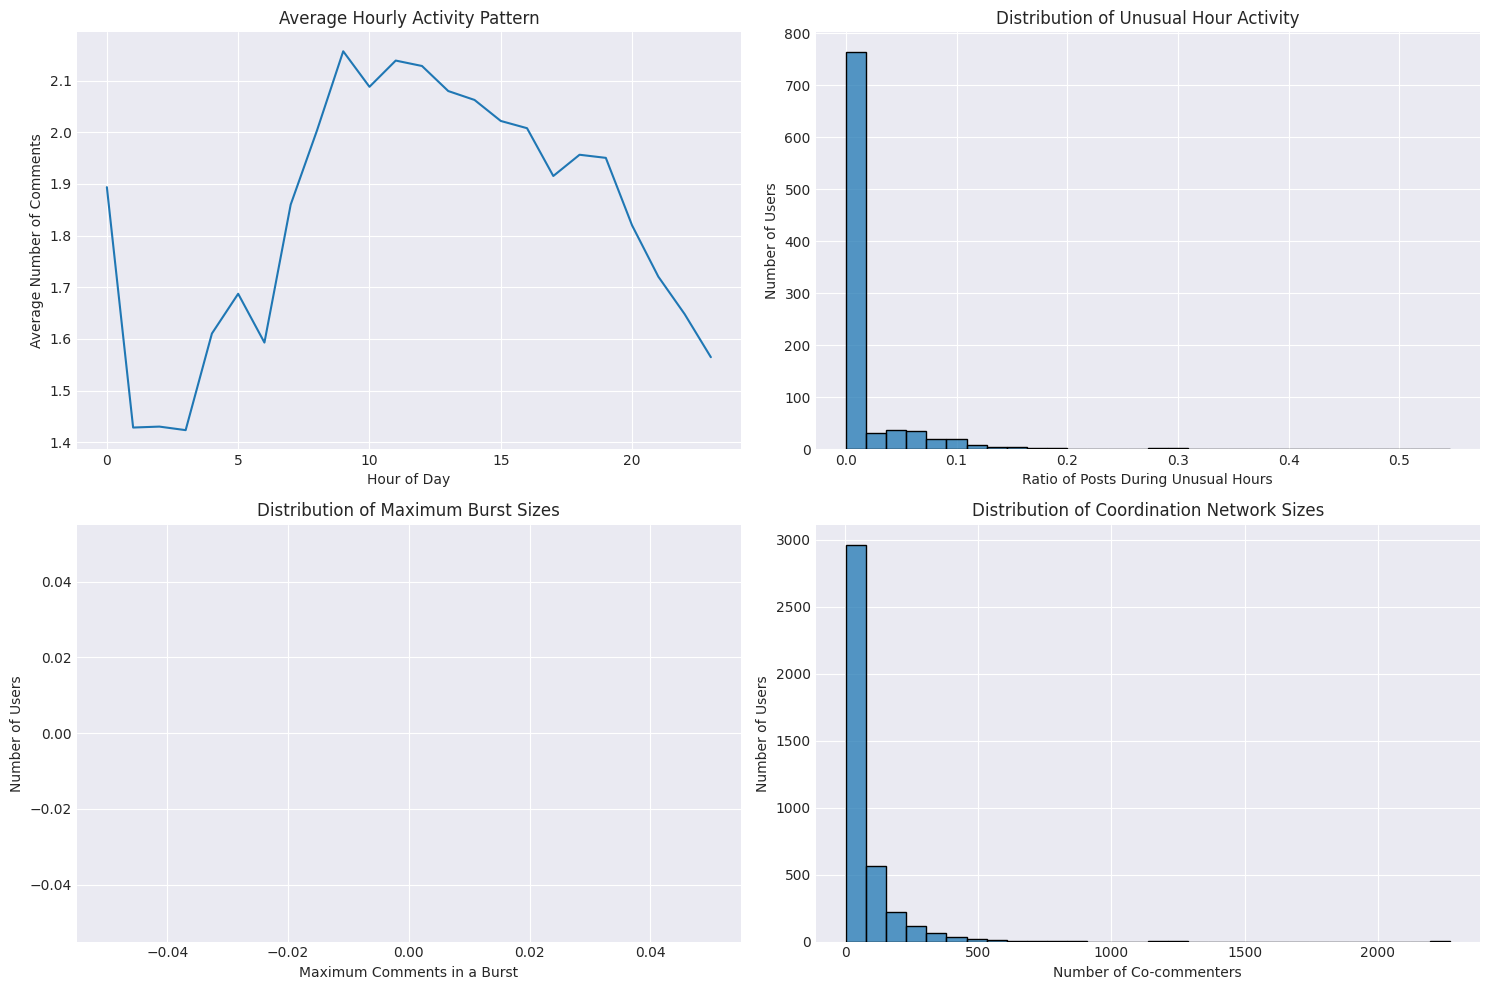


Most suspicious users based on temporal patterns:

1. User: Andrea Drncová (Suspicion Score: 2.91)
   - 54.5% posts during unusual hours
   - Peak activity hour: 1:00
   - 1 instances of coordinated activity

2. User: Oldřich Sudík (Suspicion Score: 2.70)
   - 30.0% posts during unusual hours
   - Peak activity hour: 4:00
   - 6 instances of coordinated activity

3. User: Zbyšek Zdobinský (Suspicion Score: 2.54)
   - 38.5% posts during unusual hours
   - Peak activity hour: 0:00
   - 4 instances of coordinated activity

4. User: Maxmilian Kelt (Suspicion Score: 2.54)
   - 32.1% posts during unusual hours
   - Peak activity hour: 1:00
   - 13 instances of coordinated activity

5. User: Alena Paluskova (Suspicion Score: 2.45)
   - 27.3% posts during unusual hours
   - Peak activity hour: 0:00
   - 6 instances of coordinated activity

6. User: Jan Špiroch (Suspicion Score: 2.36)
   - 18.2% posts during unusual hours
   - Peak activity hour: 19:00
   - 8 instances of coordinated activity


In [36]:
# Reimport the temporal analysis functions to get latest changes
from importlib import reload
import src.analysis.temporal_analysis
reload(src.analysis.temporal_analysis)
from src.analysis.temporal_analysis import analyze_temporal_patterns, analyze_coordination_patterns

comments_df['timestamp'] = pd.to_datetime(comments_df['publishDate'])

# Run analysis on a subset of users (e.g., 100 users)
temporal_analysis = analyze_temporal_patterns(
    comments_df,
    max_users=5000,  # Analyze only 100 users
    random_seed=42  # For reproducibility
)

In [37]:
# Reimport the temporal analysis functions to get latest changes
from importlib import reload
import src.analysis.temporal_analysis
reload(src.analysis.temporal_analysis)
from src.analysis.temporal_analysis import analyze_temporal_patterns, analyze_coordination_patterns

# Then analyze coordination patterns in detail
analyze_coordination_patterns(
    comments_df=comments_df,              
    temporal_analysis=temporal_analysis,   
    time_window_minutes=10,               # Size of time window to consider
    min_coordinated_events=20,             # Minimum events for a user to be analyzed
    max_users=5                           # Number of users to analyze in detail
)


Analyzing coordination with 10 minute window...
Found 20895 coordinated groups
Found 43606 users with any coordination

Analyzing coordination patterns for users with 20+ coordinated events
Found 3216 users with significant coordination

=== Detailed Analysis for User: Tomáš Vojtěch ===
Total coordinated events: 46

Most frequent co-commenters:
- Jan Novák: 9 shared events
- Jiří Šimoník: 8 shared events
- Jaroslav Dvořák: 7 shared events
- Petr Novák: 7 shared events
- Leoš Novak: 7 shared events

Most frequently coordinated articles:
- Article: Spolu může mít 30 procent, věří Fiala...
  Coordinated events: 3

  Example comment exchange:
    Jung Ludvik: Je nikdo už nebude volit . Jen lžou lidem a sám jim nevěřím . Zvedli daně a sobě krásné platy a na l...
    Jakub Veleba: Jedním škrtnutím pera ušetřím 100 miliard, Spolu získá ve volbách 30%, za 4 roky budeme mít německé ...
    Michal Machala: Je nepříčetný. Podle mě procedura,kterou ho někdo vytvořil k obrazu svému,a to včetně vzh

In [101]:
def analyze_user_behavior_patterns(comments_df, min_comments=10):
    """
    Analyze user behavior patterns to identify potential troll characteristics
    """
    # Create user features
    user_features = pd.DataFrame()
    
    # Group by user
    user_groups = comments_df.groupby('author')
    
    # Calculate features
    features = []
    for author, group in user_groups:
        if len(group) >= min_comments:
            # Basic metrics
            total_comments = len(group)
            unique_clusters = len(group['cluster_id'].unique())
            
            # Calculate sentiment volatility
            sentiments = []
            for attrs in group['attributes']:
                if isinstance(attrs, dict) and 'sentiment' in attrs:
                    sentiments.append(attrs['sentiment'])
            
            sentiment_counts = pd.Series(sentiments).value_counts()
            negative_ratio = sentiment_counts.get('Negative', 0) / len(sentiments) if sentiments else 0
            
            # Calculate topic switching
            cluster_transitions = sum(group['cluster_id'].diff().ne(0)) / len(group)
            

            
            features.append({
                'author': author,
                'total_comments': total_comments,
                'unique_clusters': unique_clusters,
                'cluster_diversity': unique_clusters / total_comments,
                'negative_ratio': negative_ratio,
                'cluster_transition_rate': cluster_transitions,
            })
    
    user_features = pd.DataFrame(features)
    
    # Calculate suspicion score
    user_features['suspicion_score'] = (
        user_features['negative_ratio'] * 0.5 +
        user_features['cluster_transition_rate'] * 0.5 
    )
    
    return user_features.sort_values('suspicion_score', ascending=False)

# Run the analysis
user_patterns = analyze_user_behavior_patterns(comments_df)

# Display top potential trolls
print("\nTop potential trolls based on behavior patterns:")
for _, user in user_patterns.head(10).iterrows():
    print(f"\nUser: {user['author']}")
    print(f"Suspicion Score: {user['suspicion_score']:.3f}")
    print(f"Comments: {user['total_comments']}")
    print(f"Unique Clusters: {user['unique_clusters']}")
    print(f"Negative Ratio: {user['negative_ratio']:.2f}")
    print(f"Cluster Transition Rate: {user['cluster_transition_rate']:.2f}")

KeyError: 'cluster_id'